# Global Salses Time series analysis

## 1. Importing libraries

In [1]:
import numpy as np 
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go

from prophet import Prophet

In [2]:
# Importing the dataframes
calendar= pd.read_csv('DS_market_data\daily_calendar_with_events.csv')
prices= pd.read_csv('DS_market_data\item_prices.zip')
pd_sales= pd.read_csv('DS_market_data\item_sales.zip')

In [3]:
dollar = pd.read_csv('DS_market_data\dollar_value_table.csv', index_col=0)

## Prepping Data 

In [4]:
pd_sales2 = pd_sales.transpose()

In [5]:
to_drop = ['id','item', 'category', 'department', 'store', 'store_code', 'region']

global_items_sold = pd_sales2.drop(to_drop, axis=0)
global_items_sold.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,30240,30241,30242,30243,30244,30245,30246,30247,30248,30249,30250,30251,30252,30253,30254,30255,30256,30257,30258,30259,30260,30261,30262,30263,30264,30265,30266,30267,30268,30269,30270,30271,30272,30273,30274,30275,30276,30277,30278,30279,30280,30281,30282,30283,30284,30285,30286,30287,30288,30289,30290,30291,30292,30293,30294,30295,30296,30297,30298,30299,30300,30301,30302,30303,30304,30305,30306,30307,30308,30309,30310,30311,30312,30313,30314,30315,30316,30317,30318,30319,30320,30321,30322,30323,30324,30325,30326,30327,30328,30329,30330,30331,30332,30333,30334,30335,30336,30337,30338,30339,30340,30341,30342,30343,30344,30345,30346,30347,30348,30349,30350,30351,30352,30353,30354,30355,30356,30357,30358,30359,30360,30361,30362,30363,30364,30365,30366,30367,30368,30369,30370,30371,30372,30373,30374,30375,30376,30377,30378,30379,30380,30381,30382,30383,30384,30385,30386,30387,30388,30389,30390,30391,30392,30393,30394,30395,30396,30397,30398,30399,30400,30401,30402,30403,30404,30405,30406,30407,30408,30409,30410,30411,30412,30413,30414,30415,30416,30417,30418,30419,30420,30421,30422,30423,30424,30425,30426,30427,30428,30429,30430,30431,30432,30433,30434,30435,30436,30437,30438,30439,30440,30441,30442,30443,30444,30445,30446,30447,30448,30449,30450,30451,30452,30453,30454,30455,30456,30457,30458,30459,30460,30461,30462,30463,30464,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,0,0,0,3,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,2,0,0,0,0,4,0,1,0,1,5,0,0,1,0,0,0,0,2,2,1,0,25,0,0,1,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,3,2,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,0,0,45,0,0,1,0,0,0,0,0,10,0,0,0,0,0,4,0,0,0,8,0,0,0,3,5,0,0,0,0,0,3,2,0,0,0,0,0,0,4,0,0,0,3,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,7,0,5,0,0,0,0,0,0,0,0,0,16,0,54,0,...,0,0,2,0,0,25,0,0,0,10,0,61,57,0,0,2,1,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,2,5,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,6,0,0,0,0,12,0,0,1,0,0,3,0,0,1,0,0,0,28,0,0,0,2,0,0,0,0,0,0,13,0,47,2,0,5,0,0,0,4,0,0,0,0,0,0,0,0,57,4,0,47,0,0,0,2,0,0,3,0,40,0,0,0,6,0,3,0,5,0,0,0,2,0,6,0,0,0,0,13,0,4,0,0,3,0,0,32,3,0,17,2,4,0,0,0,0,0,0,0,1,1,8,0,0,0,0,0,0,0,1,0,0,1,0,0,1,13,1,14,0,3,0,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,4,0,0,1,0,0,0,4,2,1,2,0,8,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,2,0,0,0,0,0,0,0,0,1,0,2,0,12,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,15,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,1,0,3,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,0,1,0,4,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,8,0,0,0,0,0,0,1,0,0,0,0,8,0,15,0,...,0,0,1,0,0,31,1,0,0,11,1,67,62,0,0,0,0,0,0,1,0,4,0,0,0,0,0,

In [6]:
# Creating a Total_sales by DAY
global_items_sold['Total Sales'] = global_items_sold.iloc[:,1:].sum(axis = 1)

In [7]:
global_items_sold.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,30241,30242,30243,30244,30245,30246,30247,30248,30249,30250,30251,30252,30253,30254,30255,30256,30257,30258,30259,30260,30261,30262,30263,30264,30265,30266,30267,30268,30269,30270,30271,30272,30273,30274,30275,30276,30277,30278,30279,30280,30281,30282,30283,30284,30285,30286,30287,30288,30289,30290,30291,30292,30293,30294,30295,30296,30297,30298,30299,30300,30301,30302,30303,30304,30305,30306,30307,30308,30309,30310,30311,30312,30313,30314,30315,30316,30317,30318,30319,30320,30321,30322,30323,30324,30325,30326,30327,30328,30329,30330,30331,30332,30333,30334,30335,30336,30337,30338,30339,30340,30341,30342,30343,30344,30345,30346,30347,30348,30349,30350,30351,30352,30353,30354,30355,30356,30357,30358,30359,30360,30361,30362,30363,30364,30365,30366,30367,30368,30369,30370,30371,30372,30373,30374,30375,30376,30377,30378,30379,30380,30381,30382,30383,30384,30385,30386,30387,30388,30389,30390,30391,30392,30393,30394,30395,30396,30397,30398,30399,30400,30401,30402,30403,30404,30405,30406,30407,30408,30409,30410,30411,30412,30413,30414,30415,30416,30417,30418,30419,30420,30421,30422,30423,30424,30425,30426,30427,30428,30429,30430,30431,30432,30433,30434,30435,30436,30437,30438,30439,30440,30441,30442,30443,30444,30445,30446,30447,30448,30449,30450,30451,30452,30453,30454,30455,30456,30457,30458,30459,30460,30461,30462,30463,30464,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489,Total Sales
d_1,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,0,0,0,3,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,2,0,0,0,0,4,0,1,0,1,5,0,0,1,0,0,0,0,2,2,1,0,25,0,0,1,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,3,2,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,0,0,45,0,0,1,0,0,0,0,0,10,0,0,0,0,0,4,0,0,0,8,0,0,0,3,5,0,0,0,0,0,3,2,0,0,0,0,0,0,4,0,0,0,3,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,7,0,5,0,0,0,0,0,0,0,0,0,16,0,54,0,...,0,2,0,0,25,0,0,0,10,0,61,57,0,0,2,1,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,2,5,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,6,0,0,0,0,12,0,0,1,0,0,3,0,0,1,0,0,0,28,0,0,0,2,0,0,0,0,0,0,13,0,47,2,0,5,0,0,0,4,0,0,0,0,0,0,0,0,57,4,0,47,0,0,0,2,0,0,3,0,40,0,0,0,6,0,3,0,5,0,0,0,2,0,6,0,0,0,0,13,0,4,0,0,3,0,0,32,3,0,17,2,4,0,0,0,0,0,0,0,1,1,8,0,0,0,0,0,0,0,1,0,0,1,0,0,1,13,1,14,0,3,0,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0,"32,631.00"
d_2,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,4,0,0,1,0,0,0,4,2,1,2,0,8,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,2,0,0,0,0,0,0,0,0,1,0,2,0,12,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,15,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,1,0,3,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,0,1,0,4,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,8,0,0,0,0,0,0,1,0,0,0,0,8,0,15,0,...,0,1,0,0,31,1,0,0,11,1,67,62,0,0,0,0,0,0,1,

In [8]:
#Data Frame to merge with Calendar, Dates needed show global trend
pd_sales3 = pd.DataFrame(data =(global_items_sold['Total Sales']).reset_index().values, columns=["Days","Total Sales"])
pd_sales3['Total Sales'] = pd_sales3['Total Sales'].astype(float, errors = 'raise')
pd_sales3.dtypes

Days            object
Total Sales    float64
dtype: object

In [9]:
pd_sales3['Total Sales'].describe()

count    1,913.00
mean    34,341.25
std      7,345.73
min         11.00
25%     29,654.00
50%     33,731.00
75%     38,689.00
max     57,217.00
Name: Total Sales, dtype: float64

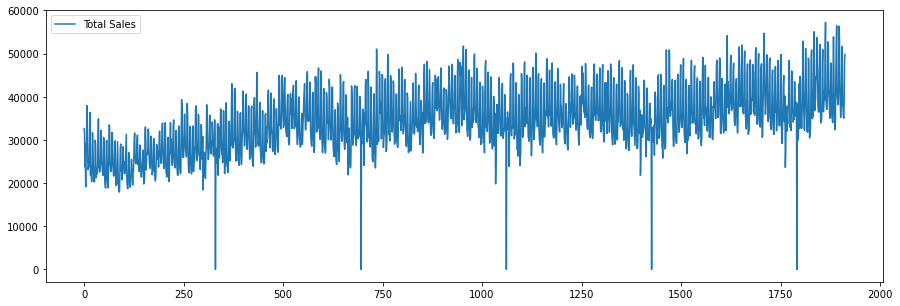

In [10]:
pd_sales3.plot(figsize=(15, 5))
plt.show()

C:\Users\Luky-\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Sales'>

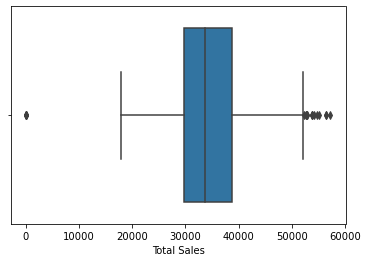

In [11]:
sns.boxplot(pd_sales3['Total Sales'])


Cleaning outliers , however the dates with drops fall on Christmas day

In [12]:
print('skewness value of Total Sales: ', pd_sales3['Total Sales'].skew())


skewness value of Total Sales:  0.03718619135728789


In [13]:
Q1= pd_sales3['Total Sales'].quantile(0.25)
Q3= pd_sales3['Total Sales'].quantile(0.75)
IQR = Q3-Q1
IQR

9035.0

In [14]:
Q1 = pd_sales3['Total Sales'].quantile(0.25)
Q3 = pd_sales3['Total Sales'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Sales_outliers = pd_sales3[(pd_sales3['Total Sales'] < Q1 - whisker_width*IQR) | (pd_sales3['Total Sales'] > Q3 + whisker_width*IQR)]
Sales_outliers.head()

,Days,Total Sales
330,d_331,13.00
696,d_697,11.00
1061,d_1062,20.00
1426,d_1427,20.00
1616,d_1617,"54,154.00"


In [15]:
Q1 = pd_sales3['Total Sales'].quantile(0.25)
Q3 = pd_sales3['Total Sales'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
pd_sales3['Total Sales']=np.where(pd_sales3['Total Sales']>upper_whisker,upper_whisker,np.where(pd_sales3['Total Sales']<lower_whisker,lower_whisker,pd_sales3['Total Sales']))

C:\Users\Luky-\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Sales'>

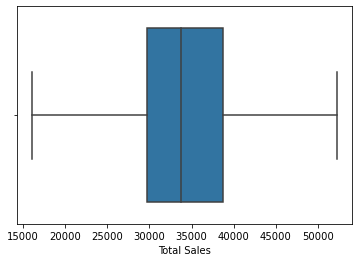

In [16]:
sns.boxplot(pd_sales3['Total Sales'],data=pd_sales3)


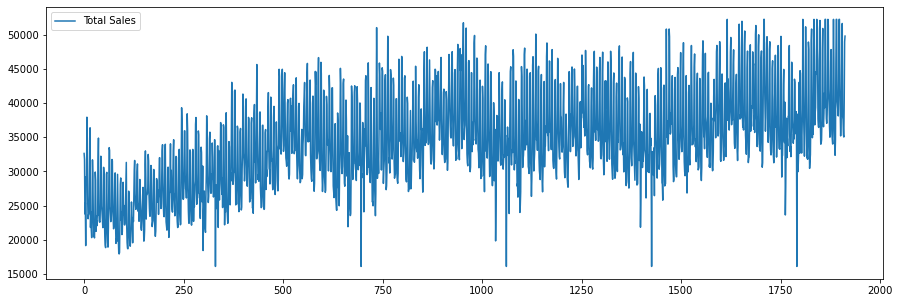

In [17]:
pd_sales3.plot(figsize=(15, 5))
plt.show()

In [18]:
global_sales_calendar = pd.concat((calendar.set_index('d'), pd_sales3.set_index('Days')), axis=1)
>>> print(global_sales_calendar)

              date    weekday  weekday_int event  Total Sales
d_1     2011-01-29   Saturday            1   NaN    32,631.00
d_2     2011-01-30     Sunday            2   NaN    31,749.00
d_3     2011-01-31     Monday            3   NaN    23,783.00
d_4     2011-02-01    Tuesday            4   NaN    25,412.00
d_5     2011-02-02  Wednesday            5   NaN    19,146.00
...            ...        ...          ...   ...          ...
d_1909  2016-04-20  Wednesday            5   NaN    35,342.00
d_1910  2016-04-21   Thursday            6   NaN    35,030.00
d_1911  2016-04-22     Friday            7   NaN    40,517.00
d_1912  2016-04-23   Saturday            1   NaN    48,961.00
d_1913  2016-04-24     Sunday            2   NaN    49,794.00

[1913 rows x 5 columns]


In [19]:
# Creating some new Datetime variables

m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

global_sales_calendar['date'] = pd.to_datetime(global_sales_calendar['date'])
 
# Creating two new features
global_sales_calendar["Quarter"] = global_sales_calendar["date"].dt.quarter
global_sales_calendar["Weekofyear"] = global_sales_calendar["date"].dt.weekofyear

# Convert into categorical data type
global_sales_calendar["Quarter"] = global_sales_calendar["Quarter"].astype("category")
global_sales_calendar["Weekofyear"] = global_sales_calendar["Weekofyear"].astype("category")

global_sales_calendar.dtypes


<ipython-input-19-1ff2b685e7c3>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  global_sales_calendar["Weekofyear"] = global_sales_calendar["date"].dt.weekofyear


date           datetime64[ns]
weekday                object
weekday_int             int64
event                  object
Total Sales           float64
Quarter              category
Weekofyear           category
dtype: object

Text(0.5, 1.0, 'Global Items Sold from Nov 2011 to April 2016')

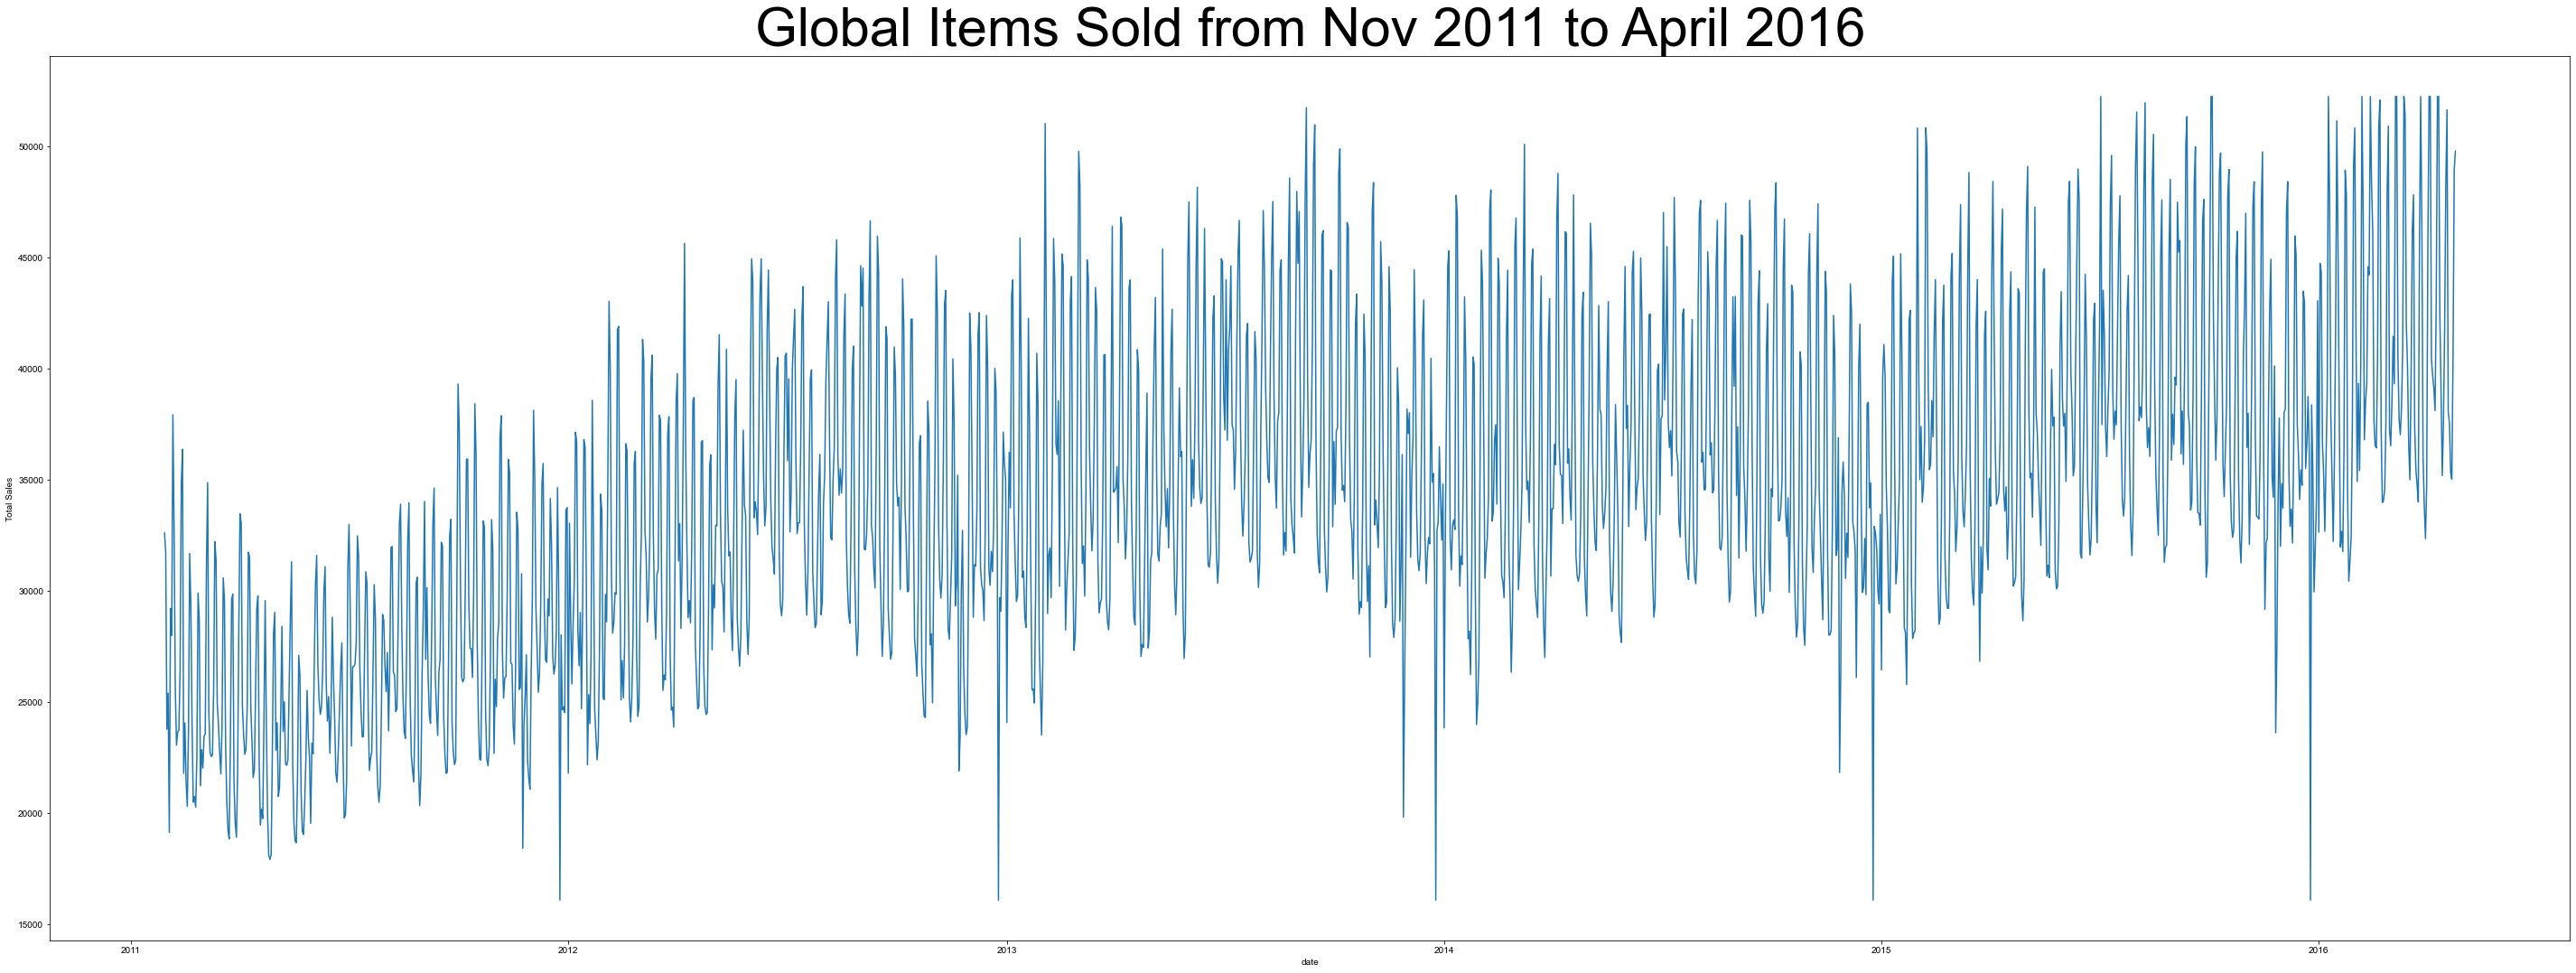

In [20]:
#Plotting the global items sold 
fig, ax = plt.subplots(figsize=(50,18))
sns.set(font_scale=5)

sns.lineplot(x='date', y='Total Sales', data=global_sales_calendar,
             ax=ax).set_title("Global Items Sold from Nov 2011 to April 2016")

# Global Sales Trends : Visualize Categorical data 

In [21]:
global_sales_calendar.head()

,date,weekday,weekday_int,event,Total Sales,Quarter,Weekofyear
d_1,2011-01-29,Saturday,1,NaN,"32,631.00",1,4
d_2,2011-01-30,Sunday,2,NaN,"31,749.00",1,4
d_3,2011-01-31,Monday,3,NaN,"23,783.00",1,5
d_4,2011-02-01,Tuesday,4,NaN,"25,412.00",1,5
d_5,2011-02-02,Wednesday,5,NaN,"19,146.00",1,5


In [22]:
global_sales_calendar.describe(include = object)

,weekday,event
count,1913,26
unique,7,5
top,Sunday,SuperBowl
freq,274,6


In [23]:
global_sales_calendar.describe(include = np.number)

,weekday_int,Total Sales
count,"1,913.00","1,913.00"
mean,4.00,"34,368.98"
std,2.00,"7,154.75"
min,1.00,"16,101.50"
25%,2.00,"29,654.00"
50%,4.00,"33,731.00"
75%,6.00,"38,689.00"
max,7.00,"52,241.50"


In [24]:
gsc_1 = global_sales_calendar

In [25]:
# Convert into categorical data type
gsc_1["Quarter"] = gsc_1["Quarter"].astype("object")
gsc_1["Weekofyear"] = gsc_1["Weekofyear"].astype("object")

In [26]:
gsc_1.dtypes

date           datetime64[ns]
weekday                object
weekday_int             int64
event                  object
Total Sales           float64
Quarter                object
Weekofyear             object
dtype: object

In [27]:
gsc_1.describe(include=object)

,weekday,event,Quarter,Weekofyear
count,1913,26,1913,1913
unique,7,5,4,53
top,Sunday,SuperBowl,1,12
freq,274,6,514,42


In [28]:
gsc_1.describe(include=np.number)

,weekday_int,Total Sales
count,"1,913.00","1,913.00"
mean,4.00,"34,368.98"
std,2.00,"7,154.75"
min,1.00,"16,101.50"
25%,2.00,"29,654.00"
50%,4.00,"33,731.00"
75%,6.00,"38,689.00"
max,7.00,"52,241.50"


## Sales per day of the week 

In [30]:
#Plotting the sales per day of the week
fig = px.line(gsc_1, x="date", y="Total Sales", color='weekday', title='Total Items Sold over time by Day of Week')
fig.show()


In [ ]:
fig = px.histogram(gsc_1, x='weekday', y="Total Sales", color = 'Quarter', title="Total Items Sold by Day of the Week")
fig.show()

## Time Series Modeling 

In [ ]:
gsc_pred = global_sales_calendar.set_index('date')
gsc_pred.shape

(1913, 6)

In [ ]:
gsc_pred.head()

,weekday,weekday_int,event,Total Sales,Quarter,Weekofyear
date,,,,,,
2011-01-29,Saturday,1,NaN,"32,631.00",1,4
2011-01-30,Sunday,2,NaN,"31,749.00",1,4
2011-01-31,Monday,3,NaN,"23,783.00",1,5
2011-02-01,Tuesday,4,NaN,"25,412.00",1,5
2011-02-02,Wednesday,5,NaN,"19,146.00",1,5


## Preparing Dataset for Modeling


In [ ]:
to_drop = ['weekday','weekday_int', 'event', 'Quarter', 'Weekofyear']
gsc_pred = gsc_pred.drop(to_drop, axis=1)
gsc_pred_w = gsc_pred['2011-01-31':'2016-04-24'].resample('W').sum()
gsc_pred_w.head()

,Total Sales
date,
2011-02-06,"196,230.00"
2011-02-13,"193,715.00"
2011-02-20,"172,328.00"
2011-02-27,"166,645.00"
2011-03-06,"179,283.00"


In [ ]:
px.line(gsc_pred_w, y = 'Total Sales')

# Prophet Prediction Model

In [ ]:
gsc_pred1 = gsc_pred.reset_index()
gsc_pred1.rename(columns={'Total Sales': 'y'}, inplace=True)
gsc_pred1.rename(columns={'date': 'ds'}, inplace=True)
gsc_pred1.head()

,ds,y
0,2011-01-29,"32,631.00"
1,2011-01-30,"31,749.00"
2,2011-01-31,"23,783.00"
3,2011-02-01,"25,412.00"
4,2011-02-02,"19,146.00"


In [ ]:
px.line(gsc_pred1, x ='ds', y = 'y')

In [ ]:
m = Prophet()
m.fit(gsc_pred1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-29,"23,534.74","26,560.97","34,261.76","23,534.74","23,534.74","6,834.20","6,834.20","6,834.20","7,144.39","7,144.39","7,144.39",-310.19,-310.19,-310.19,0.00,0.00,0.00,"30,368.94"
1,2011-01-30,"23,548.29","26,012.40","34,115.06","23,548.29","23,548.29","6,585.95","6,585.95","6,585.95","6,786.62","6,786.62","6,786.62",-200.67,-200.67,-200.67,0.00,0.00,0.00,"30,134.24"
2,2011-01-31,"23,561.84","17,772.48","26,094.01","23,561.84","23,561.84","-1,584.08","-1,584.08","-1,584.08","-1,492.99","-1,492.99","-1,492.99",-91.09,-91.09,-91.09,0.00,0.00,0.00,"21,977.75"
3,2011-02-01,"23,575.39","15,949.37","23,398.85","23,575.39","23,575.39","-3,909.63","-3,909.63","-3,909.63","-3,927.65","-3,927.65","-3,927.65",18.02,18.02,18.02,0.00,0.00,0.00,"19,665.76"
4,2011-02-02,"23,588.93","15,185.70","23,492.36","23,588.93","23,588.93","-4,169.51","-4,169.51","-4,169.51","-4,295.61","-4,295.61","-4,295.61",126.10,126.10,126.10,0.00,0.00,0.00,"19,419.42"


## Visualization of results

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

Break down the results

In [ ]:
plot_components_plotly(m, forecast)

## Adding hollidays to the model

In [ ]:
calendar.fillna(0, inplace=True)

holidays = calendar.loc[calendar['event'] != 0].reset_index()
holidays.rename(columns={'date':'ds'}, inplace=True)
holidays.rename(columns={'event':'holiday'}, inplace=True)


holidays.head()

,index,ds,weekday,weekday_int,d,holiday
0,8,2011-02-06,Sunday,2,d_9,SuperBowl
1,184,2011-08-01,Monday,3,d_185,Ramadan starts
2,299,2011-11-24,Thursday,6,d_300,Thanksgiving
3,337,2012-01-01,Sunday,2,d_338,NewYear
4,372,2012-02-05,Sunday,2,d_373,SuperBowl


In [ ]:
to_drop = ['index','weekday', 'weekday_int']
holidays = holidays.drop(to_drop, axis=1)

In [ ]:
holidays = holidays.assign(lower_window = 0 ,upper_window=1)

In [ ]:
# Looking at the hollidays in the calendar df
holidays['holiday'].value_counts()

SuperBowl         6
Ramadan starts    5
Easter            5
Thanksgiving      5
NewYear           5
Name: holiday, dtype: int64

In [ ]:
m = Prophet(holidays=holidays)
forecast = m.fit(gsc_pred1).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Looking at the impact of hollidays and events on the model
forecast[(forecast['SuperBowl'] + forecast['Ramadan starts'] + forecast['NewYear'] + forecast['Thanksgiving'] + forecast['Easter']).abs() > 0][
    ['ds', 'SuperBowl', 'Ramadan starts','NewYear','Thanksgiving','Easter']][-10:]

,ds,SuperBowl,Ramadan starts,NewYear,Thanksgiving,Easter
1601,2015-06-18,0.00,26.72,0.00,0.00,0.00
1602,2015-06-19,0.00,-560.87,0.00,0.00,0.00
1762,2015-11-26,0.00,0.00,0.00,"-8,414.92",0.00
1763,2015-11-27,0.00,0.00,0.00,"-8,029.16",0.00
1798,2016-01-01,0.00,0.00,"-6,714.45",0.00,0.00
1799,2016-01-02,0.00,0.00,"3,311.93",0.00,0.00
1835,2016-02-07,57.30,0.00,0.00,0.00,0.00
1836,2016-02-08,-236.12,0.00,0.00,0.00,0.00
1884,2016-03-27,0.00,0.00,0.00,0.00,"-3,917.07"
1885,2016-03-28,0.00,0.00,0.00,0.00,"-1,012.97"


In [ ]:
plot_components_plotly(m, forecast)

Using Prophet built-in collection of country-specific holidays 

In [ ]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(gsc_pred1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [ ]:
forecast = m.predict(future)
plot_components_plotly(m, forecast)

### Fourier Order of Seasonalities
Seasonalities are estimated using a partial Fourier sum. The number of terms in the partial sum(the order) is a parameter that determines how quickly the seasonality can change.


The default Fourier order for yearly seasonality is 10. The default values are often appropriate, but they can be increased when the seasonality needs to fit higher-frequency changes, and generally be less smooth. The Fourier order can be specified for each built-in seasonality when instantiating the model, here it is increased to 20.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


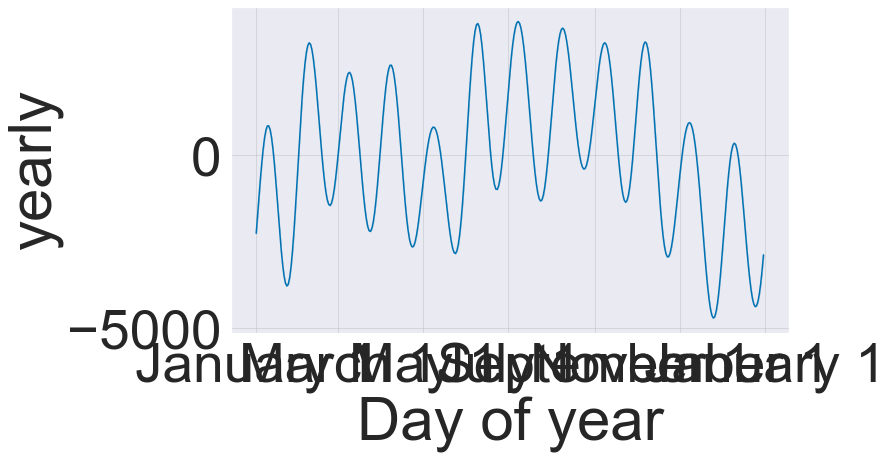

In [ ]:
from prophet.plot import plot_yearly
m_yearly = Prophet(yearly_seasonality=20).fit(gsc_pred1)
a = plot_yearly(m_yearly)